(lecture04:scatter)=
# Scatter plots

Scatter plots are a nice way to investigate if there are correlations between measured scalar variables.
To see what they are, let's load the standard libraries:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np

And let's also download a dataset we introduced in {ref}`lecture03:pandas`:

In [2]:
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)
   
# The url of the file we want to download
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/temp_price.csv'
download(url)

Let's load the file:

In [3]:
import pandas as pd
temp_price = pd.read_csv('temp_price.csv')
temp_price.head()

,household,date,score,t_out,t_unit,hvac,price,Price per week,Price per day
0,a1,2019-01-06,85,38.599231,71.580704,35.113758,0.17303,6.075734,0.867962
1,a10,2019-01-06,70,38.599231,73.286260,63.949057,0.17303,11.065105,1.580729
2,a11,2019-01-06,61,38.599231,74.252046,147.612108,0.17303,25.541323,3.648760
3,a12,2019-01-06,65,38.599231,73.708482,74.394518,0.17303,12.872483,1.838926
4,a13,2019-01-06,66,38.599231,73.549554,173.095836,0.17303,29.950772,4.278682


We are going to clean them up as we did before:

In [4]:
clean_data = temp_price.dropna(axis=0).rename(columns={'Price per week': 'week_price',
                                                       'Price per day': 'daily_price'})
clean_data.head()

,household,date,score,t_out,t_unit,hvac,price,week_price,daily_price
0,a1,2019-01-06,85,38.599231,71.580704,35.113758,0.17303,6.075734,0.867962
1,a10,2019-01-06,70,38.599231,73.286260,63.949057,0.17303,11.065105,1.580729
2,a11,2019-01-06,61,38.599231,74.252046,147.612108,0.17303,25.541323,3.648760
3,a12,2019-01-06,65,38.599231,73.708482,74.394518,0.17303,12.872483,1.838926
4,a13,2019-01-06,66,38.599231,73.549554,173.095836,0.17303,29.950772,4.278682


Notice that the dataset includes only one day, 01/06/2019, and that the average temperature is 38.6 degrees F.
We have 50 different records each one corresponding to a different appartment in the same residential building.

Let us see first, how energy consumption `hvac` correlates with the weekly bill `week_price`.

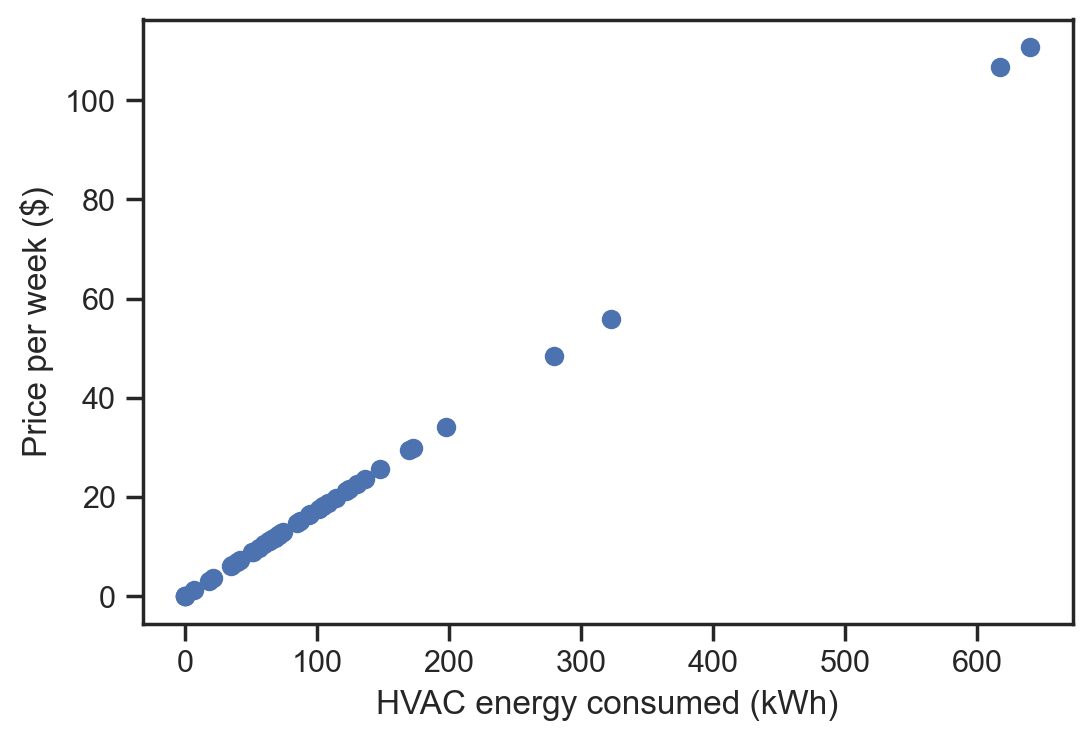

In [5]:
fig, ax = plt.subplots()
ax.scatter(clean_data['hvac'], clean_data['week_price'])
ax.set_xlabel('HVAC energy consumed (kWh)')
ax.set_ylabel('Price per week ($)');

This kind of plot is called a "scatter plot."
Okay, this makes sense. The more energy energy a unit consumes the higher the energy bill.
The relationship between the two is linear reflecting the fact that each household is paying for the same price per kWh.

The relationship depicted here is also **causal**.
The energy is consumption is causing the bill be higher.
However, this causality direction does not come from the data alone.
It comes from us applying using our knowledge about how energy bills are calculated...

What other causal relationships could we have?
Let's look at the temperature of eafch household `t_unit` vs the energy consumed `hvac`.
Here is the scatter plot:

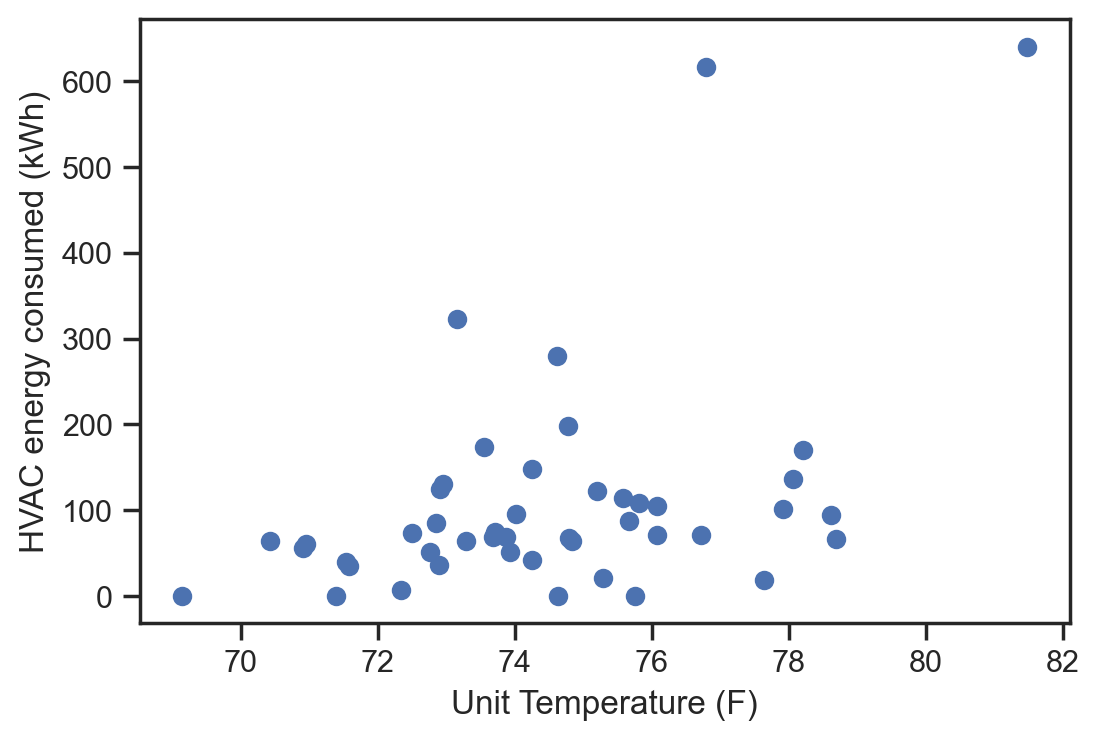

In [6]:
fig, ax = plt.subplots()
ax.scatter(clean_data['t_unit'], clean_data['hvac'])
ax.set_xlabel('Unit Temperature (F)')
ax.set_ylabel('HVAC energy consumed (kWh)');

We observe that higher unit temperature, in general, leads to higher HVAC energy consumption.
However, the relation is not one-to-one.
This is because the appartments in this building have different physical characteristics.
For example, an appartment that is at the corner of the the building has more of each external surfaces to the environment and thus it needs more energy to maintain a given temperature than an appartment that is, say, in the middle of the building.
As a matter of fact, notice that there are some appartments that consume zero energy even though the external temperature is 38 degrees F.
These guys are getting their heating for free from their neighbors!

So, the relationship between unit temperature and HVAC energy consumption is causal to some degree.
But there are other variables that affect it as well.
Here, these are: the physical characteristics of the appartment and the temperature of the neighboring units.
More often than not, this is the situation we find ourselves when dealing with real datasets.

## Question

In the code block below, do the scatter plot between unit temperature `t_unit` and the variable `score`.
The variable `score` is a measure we developed in our NSF project to characterize how well occupants behave related to energy consumption.
It is a number between zero and 100.
The bigger the score, the better the household is at conserving energy.
Note that we calculate this score using the detailed behavior of the household during an entire week.
We look at things like the temperature setpoint the occupants pick when they are home during the day, when they sleep, and when they are away.
We do not just look at the unit temperature.
Think:
+ Is there a correlation between `t_unit` and `score`?
+ Based on what I told you about the calculation of the `score`, is there a causal relationship beteween the variables?

In [7]:
# Your code here